In [1]:
# Sentiment Prediction using GRU

# 📥 Step 1: Load and Preprocess the Dataset
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load dataset (only top 10,000 words)
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Pad sequences to the same length
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)


2025-04-18 19:43:18.754471: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/rutulbhosale/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
# 🏗️ Step 2: Build the GRU Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout

model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_len),
    GRU(64, return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=4, batch_size=128, validation_split=0.2)


/Users/rutulbhosale/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 95s 557ms/step - accuracy: 0.6211 - loss: 0.6205 - val_accuracy: 0.8372 - val_loss: 0.3730
Epoch 2/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 304ms/step - accuracy: 0.8883 - loss: 0.2824 - val_accuracy: 0.8646 - val_loss: 0.3219
Epoch 3/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 47s 300ms/step - accuracy: 0.9298 - loss: 0.1887 - val_accuracy: 0.8692 - val_loss: 0.3463
Epoch 4/4
157/157 ━━━━━━━━━━━━━━━━━━━━ 48s 307ms/step - accuracy: 0.9540 - loss: 0.1331 - val_accuracy: 0.8632 - val_loss: 0.3685


In [3]:
# 📊 Step 3: Evaluate the Model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.8568 - loss: 0.3907
Test Accuracy: 0.8588


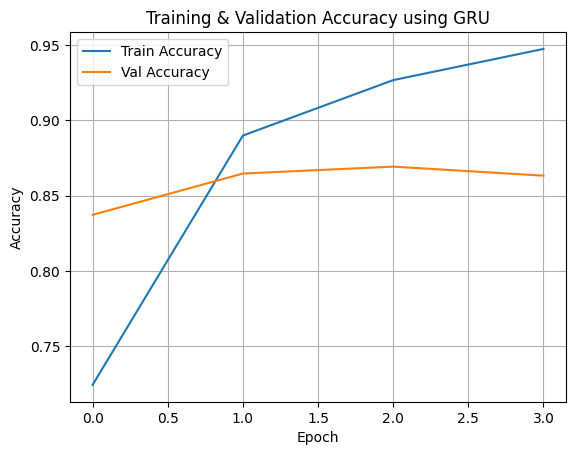

In [7]:
# 📉 Step 4: Optional – Visualize Accuracy & Loss
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training & Validation Accuracy using GRU')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

